# Objective
### Develop a model to predict customer churn for a subscription- based service or business.

In [80]:
# importing required pacakages
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [84]:
#checking datatype of each feature, also we can observe that there are no missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Remove redundant columns

In [85]:
df = df.drop(columns=['RowNumber', 'CustomerId', 'Surname'])
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# EDA

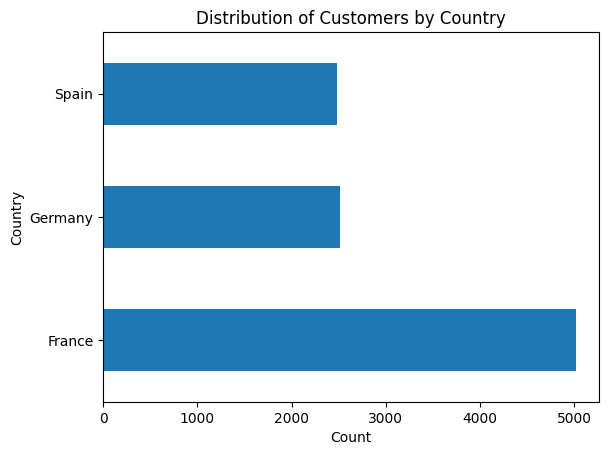

In [86]:
df.Geography.value_counts().plot(kind='barh')
plt.xlabel('Count')
plt.ylabel('Country')
plt.title('Distribution of Customers by Country')
plt.show()

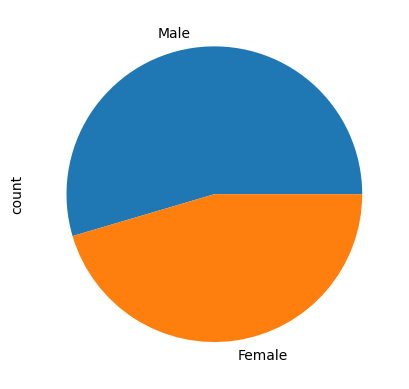

In [87]:
df.Gender.value_counts().plot(kind='pie')
plt.show()

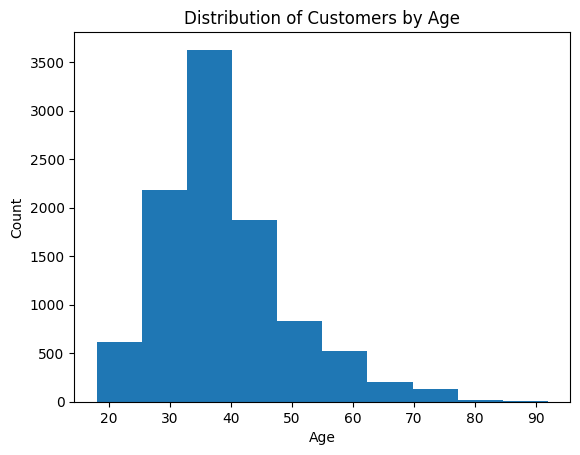

In [88]:
df.Age.plot(kind='hist')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Customers by Age')
plt.show()

Converting categorical variable by using label encoder

In [89]:
label_encoder = LabelEncoder()
df['Geography'] = label_encoder.fit_transform(df['Geography'])
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


Define independent features and dependent variables

In [90]:
X = df.drop(columns=['Exited'])
y = df['Exited']

Split the data into training and testing datasets

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [92]:
#class imbalancing, so use SMOTE to balance the classes
y_train.value_counts()

Exited
0    6356
1    1644
Name: count, dtype: int64

In [93]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

Applying Standard Scaler to bring features to the same level

In [94]:
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

Using Random Forest Classifier for prediction with hyper parameter tuning

In [95]:
rf=RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(max_depth=10, random_state=42)

In [96]:
# Predicting values for train and test data
y_train_pred = rf.predict(X_train_resampled)
y_test_pred = rf.predict(X_test)

In [97]:
# Evaluation on train data
train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
train_conf_matrix = confusion_matrix(y_train_resampled, y_train_pred)

In [98]:
print(f'Training Accuracy: {train_accuracy}')
print('Training Confusion Matrix:')
print(train_conf_matrix)

Training Accuracy: 0.8919918187539333
Training Confusion Matrix:
[[5659  697]
 [ 676 5680]]


In [99]:
#Evaluation on the test data
test_accuracy = accuracy_score(y_test, y_test_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)

In [100]:
print(f'Testing Accuracy: {test_accuracy}')
print('Testing Confusion Matrix:')
print(test_conf_matrix)
print(classification_report(y_test, y_test_pred))

Testing Accuracy: 0.809
Testing Confusion Matrix:
[[1361  246]
 [ 136  257]]
              precision    recall  f1-score   support

           0       0.91      0.85      0.88      1607
           1       0.51      0.65      0.57       393

    accuracy                           0.81      2000
   macro avg       0.71      0.75      0.73      2000
weighted avg       0.83      0.81      0.82      2000



# Result:

The model achieved 89.20% training accuracy and 81.55% testing accuracy. This performance indicates that the model has decent predictive capability to predict customer churn.

